<a href="https://colab.research.google.com/github/guptaprateek98/capstone_hotel/blob/main/Copy_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from datetime import date
import folium
import plotly.express as px
%matplotlib inline

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
h_df = pd.read_csv('/content/drive/MyDrive/hotel_capstone/Copy_of Hotel Bookings.csv')

###**Exploring data**

In [5]:
h_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
h_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
h_df.shape

(119390, 32)

In [9]:
hdf_columns_table=[[name,h_df[name].dtypes,h_df[name].isnull().sum(),round(h_df[name].isnull().sum()/len(h_df)*100, 2),
                   h_df[name].nunique(),h_df[name].unique()] for name in h_df.columns]
hdf_columns = pd.DataFrame(hdf_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
hdf_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


#**Data cleaning**

In [10]:
#finding duplicate rows,
h_df[h_df.duplicated()].shape

(31994, 32)

In [11]:
#to delete duplicaye rows
h_df.drop_duplicates(inplace = True)

In [12]:
h_df[h_df.duplicated()].shape

(0, 32)

In [13]:
h_df['children']=h_df.children.fillna(h_df.children.mean())        # replacing null value in children column with mean children column
h_df['country']=h_df.country.fillna('others')                      # replacing null values in country column with 'others'
h_df['company']=h_df.company.fillna(0)                             # replacing null values in company column with 0
h_df['agent']=h_df.agent.fillna(0)                                 # replacing null values in agent column with 0

In [14]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

##**Comparision between two hotels on basis of cancellation rate.**

In [15]:
total_city = h_df.loc[h_df['hotel'] == 'City Hotel', ['is_canceled','arrival_date_year','arrival_date_month']]
total_resort = h_df.loc[h_df['hotel'] == 'Resort Hotel',['is_canceled','arrival_date_year','arrival_date_month']]

In [16]:
City_months =[i for i in total_city.is_canceled if i  == 1]

In [17]:
len(City_months)

16049

In [18]:
aaa = total_city.groupby(['arrival_date_year','arrival_date_month']).agg({'is_canceled':'count'}).unstack()

In [19]:
aaa.fillna(1,inplace = True)

In [20]:
aaa

is_canceled                                            \
arrival_date_month       April  August December February January    July   
arrival_date_year                                                          
2015                       1.0  1107.0   1020.0      1.0     1.0   395.0   
2016                    2413.0  2816.0   1994.0   1661.0  1030.0  2487.0   
2017                    2667.0  2668.0      1.0   1944.0  1700.0  2862.0   

                                                                       
arrival_date_month    June   March     May November October September  
arrival_date_year                                                      
2015                   1.0     1.0     1.0    797.0  1559.0    1672.0  
2016                2285.0  2368.0  2343.0   2145.0  2649.0    2568.0  
2017                2720.0  2488.0  3070.0      1.0     1.0       1.0

In [21]:
city_count_cancel= total_city.loc[total_city['is_canceled']==1,['is_canceled','arrival_date_year','arrival_date_month']]

In [22]:
ccc = city_count_cancel.groupby(['arrival_date_year','arrival_date_month']).agg({'is_canceled':'count'}).unstack()

In [23]:
ccc.fillna(0,inplace = True)

In [24]:
ccc

is_canceled                                                 \
arrival_date_month       April August December February January   July   June   
arrival_date_year                                                               
2015                       0.0  229.0    220.0      0.0     0.0  232.0    0.0   
2016                     749.0  910.0    760.0    376.0   214.0  678.0  612.0   
2017                    1001.0  971.0      0.0    599.0   550.0  988.0  909.0   

                                                              
arrival_date_month  March     May November October September  
arrival_date_year                                             
2015                  0.0     0.0    137.0   289.0     314.0  
2016                647.0   643.0    609.0   838.0     753.0  
2017                718.0  1103.0      0.0     0.0       0.0

In [25]:
bbb = round(ccc.reset_index(drop = True)*100/aaa.reset_index(drop = True),2)

In [26]:
bbb.index = aaa.index

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

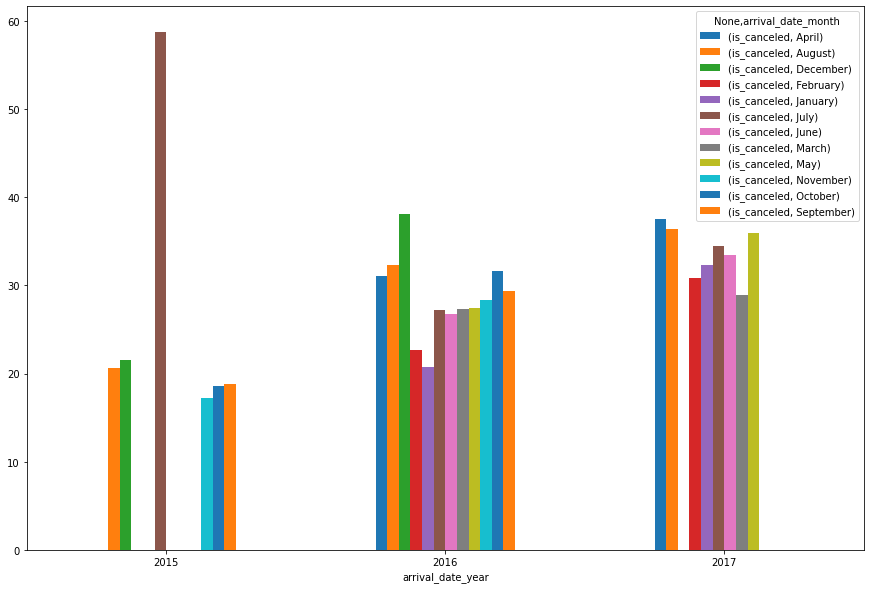

In [27]:
plt.rcParams['figure.figsize'] = (15, 10)
bbb.plot.bar()
plt.xticks(rotation = 0)

##**Customer Retention**

In [28]:
h_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
h_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [30]:
h_df['is_repeated_guest'].value_counts()

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

In [31]:
only_repeated_cust = h_df[h_df['is_repeated_guest']==1]

In [32]:
cust_retention = only_repeated_cust.groupby(['hotel','customer_type'])['is_repeated_guest'].count().unstack()

In [33]:
cust_retention

customer_type,Contract,Group,Transient,Transient-Party
hotel,,,,
City Hotel,14,44,1506,144
Resort Hotel,19,112,1430,146


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

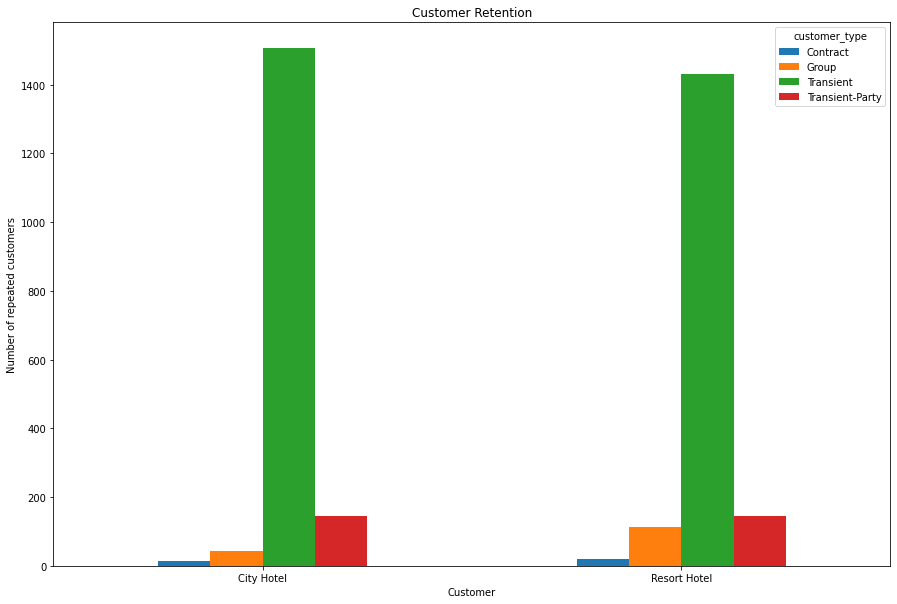

In [34]:
cust_retention.plot.bar()

plt.title('Customer Retention')
plt.ylabel('Number of repeated customers')
plt.xlabel('Customer')
plt.xticks(rotation = 0)

In [35]:
type(cust_retention)

pandas.core.frame.DataFrame

In [36]:
h_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [37]:
city_bookings = h_df.loc[h_df['hotel']== 'City Hotel',['is_canceled','arrival_date_month']]

In [38]:
a_city = city_bookings.groupby(['arrival_date_month'])['is_canceled'].count()

In [39]:
city_cancelations = city_bookings.loc[city_bookings['is_canceled']== 1,['is_canceled','arrival_date_month']]

In [40]:
b_city = city_cancelations.groupby(['arrival_date_month'])['is_canceled'].count()

In [41]:
city_book_cancel = pd.concat([a_city,b_city],axis = 1, keys = ['total bookings','cancelations'])

Text(0.5, 1.0, 'City Hotel')

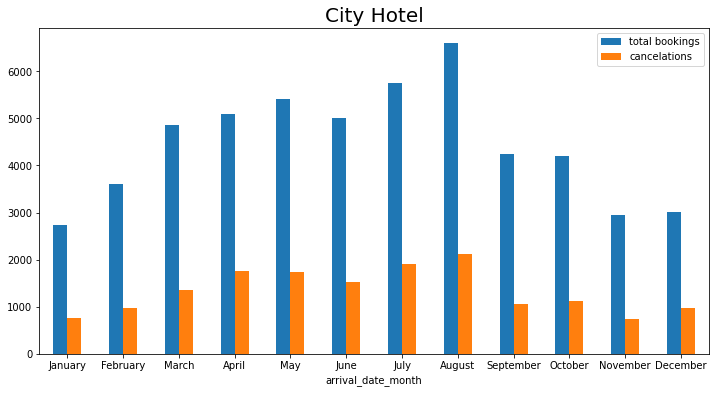

In [42]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.rcParams['figure.figsize'] = (12, 6)
city_book_cancel.reindex(months).plot.bar()
plt.xticks(rotation = 0)
plt.title('City Hotel',fontsize=20)

In [43]:
resort_bookings = h_df.loc[h_df['hotel']== 'Resort Hotel',['hotel','is_canceled','arrival_date_year','arrival_date_month',]]

In [44]:
a_resort = resort_bookings.groupby(['arrival_date_month'])['is_canceled'].count()

In [45]:
resort_cancelations = resort_bookings.loc[resort_bookings['is_canceled']== 1,['is_canceled','arrival_date_month']]

In [46]:
b_resort = resort_cancelations.groupby(['arrival_date_month'])['is_canceled'].count()

In [47]:
resort_book_cancel = pd.concat([a_resort,b_resort],axis = 1, keys = ['total bookings','cancelations'])

Text(0.5, 1.0, 'Resort Hotel')

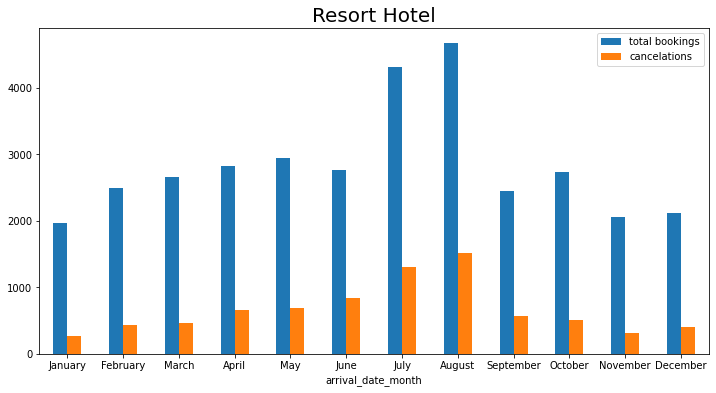

In [48]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.rcParams['figure.figsize'] = (12, 6)
resort_book_cancel.reindex(months).plot.bar()
plt.xticks(rotation = 0)
plt.title('Resort Hotel',fontsize=20)

#**customers make the special requests**

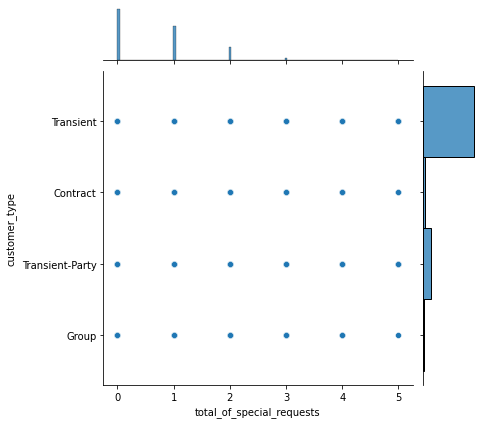

In [51]:
# joint plot between customer type and total no of special requests
sns.jointplot(x=h_df['total_of_special_requests'],y=h_df['customer_type'])

#**customer type, booked the hotels most.**



Text(0, 0.5, 'Count-->')

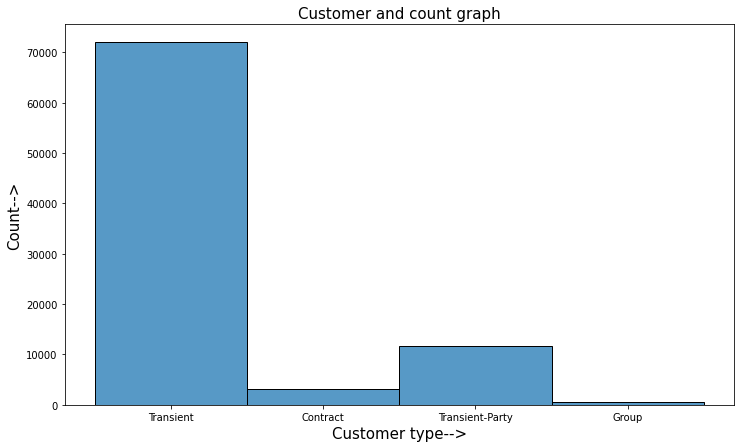

In [52]:
# histogram plot of customer's count
plt.figure(figsize=(12,7))
sns.histplot(h_df['customer_type'])
plt.title('Customer and count graph',fontsize=15)
plt.xlabel('Customer type-->',fontsize=15)
plt.ylabel('Count-->',fontsize=15)

In [53]:
h_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')